In [112]:
import matplotlib.pyplot as plt
import scipy.signal as sp
import numpy as np

here we will read ECG. each line repesent a single heart beat. after each sample there is "|"

In [113]:
def get_values_from_line(line:str):
    values_str = line.split(sep="|")#return return list of float string values
    
    values =[]
    for i in range(len(values_str) - 1):#len(values_str) -1 because the end entry is "" or "\n"
        values.append(float(values_str[i]))

    return values


In [114]:
def get_ECG_data(filePath:str):
    dataFile = open(filePath,'r')
    data = [[]] #I do this to return data in right way

    for line in dataFile.readlines():
        values = get_values_from_line(line)#get samples of each heart beat 
        data.append(values)

    dataFile.close()
    return data[1:]# because first entery is [] we don't need it in the data

before bandpass filter

In [115]:
data_normal = get_ECG_data(r"D:\projects\dsp project\Data\Normal&PVC\Normal_Train.txt")
print(len(data_normal))

200


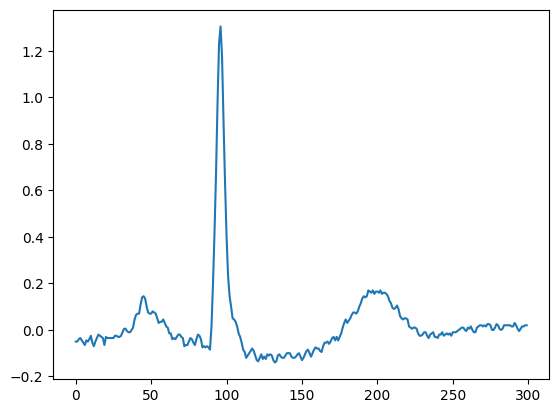

In [116]:
plt.plot(data_normal[0])


after band pass filter

300
<class 'numpy.ndarray'>


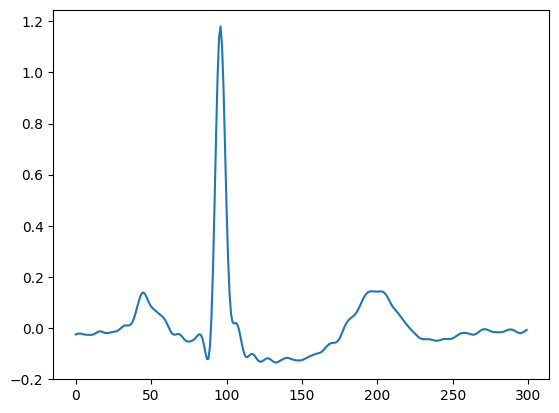

In [117]:
fs = 360  # Sampling frequency
lowcut = 0.5  # Low cutoff frequency in Hz
highcut = 40.0  # High cutoff frequency in Hz

# Design Butterworth bandpass filter
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = sp.butter(N=4, Wn=[low, high], btype='band')

# Apply the filter
filtered_data = sp.filtfilt(b, a, data_normal[0])

#filtered_data[:10]
print(len(filtered_data))
print(type(filtered_data))
plt.plot(filtered_data)


our preprossing functions

In [118]:
def bandpass_filter(data, lowcut = 0.5, highcut= 40.0,fs = 360, order = 4 ):
    # Design Butterworth bandpass filter
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = sp.butter(N=4, Wn=[low, high], btype='band')

    # Apply the filter
    filtered_data = sp.filtfilt(b, a, data)
    return filtered_data


In [119]:
def get_filtered_data(data, lowcut = 0.5, highcut= 40.0,fs = 360, order = 4):
    filtered_data = []
    for beat in data:
        filtered_data.append(bandpass_filter(data=beat, lowcut=lowcut, highcut=highcut, fs=fs,order=order))
    return filtered_data

200
<class 'list'>
<class 'numpy.ndarray'>
300


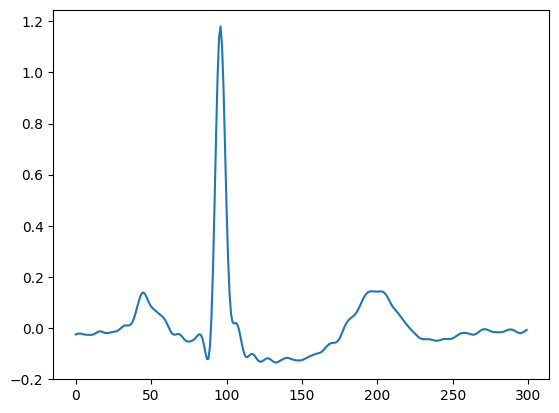

In [120]:
da = []
for beat in data_normal:
    da.append(bandpass_filter(data=beat))

print(len(da))
print(type(da))
print(type(da[0]))
print(len(da[0]))
plt.plot(da[0])


200
<class 'list'>
<class 'numpy.ndarray'>
300


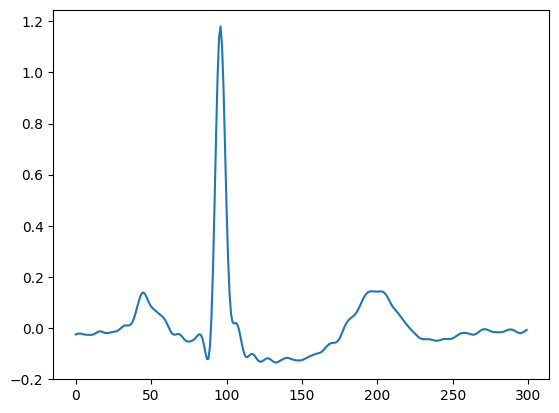

In [121]:
f = get_filtered_data(data_normal)

print(len(f))
print(type(f))
print(type(f[0]))
print(len(f[0]))
plt.plot(f[0])


normalize_signal

In [122]:
def Normalize_Signal(data, check):
    """
    Normalize all sublists in the input data to the range [0, 1] or [-1, 1].

    :param data: A list of lists containing signal data.
    :param check: Integer flag. If 0, normalize to [0, 1]. If 1, normalize to [-1, 1].
    :return: A list of normalized sublists.
    """
    normalized_data = []

    for y in data:
        # Get min and max values in the sublist
        min_element = min(y)
        max_element = max(y)

        if min_element == max_element:
            raise ValueError("Normalization not possible: all values in a sublist are the same.")

        # Normalize based on the check parameter
        if check == 0:
            y_normalized = [(x - min_element) / (max_element - min_element) for x in y]
        else:
            y_normalized = [2 * (x - min_element) / (max_element - min_element) - 1 for x in y]

        normalized_data.append(y_normalized)

    return normalized_data

200
<class 'list'>
300
<class 'list'>


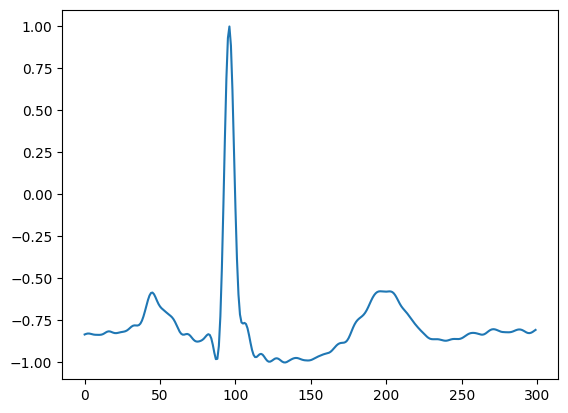

In [123]:
normalized_signal = Normalize_Signal(f, check=1)  # Use check=1 for [-1, 1] normalization
#print("Normalized Signal:", normalized_signal)
print(len(normalized_signal))
print(type(normalized_signal))
print(len(normalized_signal[0]))
print(type(normalized_signal[0]))
plt.plot(normalized_signal[0])